In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
heartdisease = pd.read_csv("data/heart.csv")
heartdisease.columns = ['age', 'sex', 'chestpain type', 'blood pressure', 'cholestoral', 'blood sugar', 'electrocardiographic', 'max heart rate', 'angina', 'ST curve depression', 'ST slope', 'vessels number', 'thal', 'target']
a = pd.get_dummies(heartdisease['chestpain type'], prefix = "cp")
b = pd.get_dummies(heartdisease['thal'], prefix = "thal")
c = pd.get_dummies(heartdisease['ST slope'], prefix = "slope")
frames = [heartdisease, a, b, c]
df = pd.concat(frames, axis = 1).drop(columns = ['chestpain type', 'thal', 'ST slope'])
df

age  sex  blood pressure  cholestoral  blood sugar  electrocardiographic  \
0     63    1             145          233            1                     0   
1     37    1             130          250            0                     1   
2     41    0             130          204            0                     0   
3     56    1             120          236            0                     1   
4     57    0             120          354            0                     1   
..   ...  ...             ...          ...          ...                   ...   
298   57    0             140          241            0                     1   
299   45    1             110          264            0                     1   
300   68    1             144          193            1                     1   
301   57    1             130          131            0                     1   
302   57    0             130          236            0                     0   

     max heart rate  angina  ST curve depression  vessels number  ...  cp_1  \
0               150       0                  2.3               0  ...     0   
1               187       0                  3.5               0  ...     0   
2               172       0                  1.4               0  ...     1   
3               178       0                  0.8               0  ...     1   
4               163       1                  0.6               0  ...     0   
..              ...     ...                  ...             ...  ...   ...   
298             123       1                  0.2               0  ...     0   
299             132       0                  1.2               0  ...     0   
300             141       0                  3.4               2  ...     0   
301             115       1                  1.2               1  ...     0   
302             174       0                  0.0               1  ...     1   

     cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  slope_2  
0       0     1       0       1       0       0        1        0        0  
1       1     0       0       0       1       0        1        0        0  
2       0     0       0       0       1       0        0        0        1  
3       0     0       0       0       1       0        0        0        1  
4       0     0       0       0       1       0        0        0        1  
..    ...   ...     ...     ...     ...     ...      ...      ...      ...  
298     0     0       0       0       0       1        0        1        0  
299     0     1       0       0       0       1        0        1        0  
300     0     0       0       0       0       1        0        1        0  
301     0     0       0       0       0       1        0        1        0  
302     0     0       0       0       1       0        0        1        0  

[303 rows x 22 columns]

In [24]:
from sklearn.model_selection import train_test_split
y = df.target.values
x = df.drop(['target'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

### Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Model Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Model Accuracy 77.05%


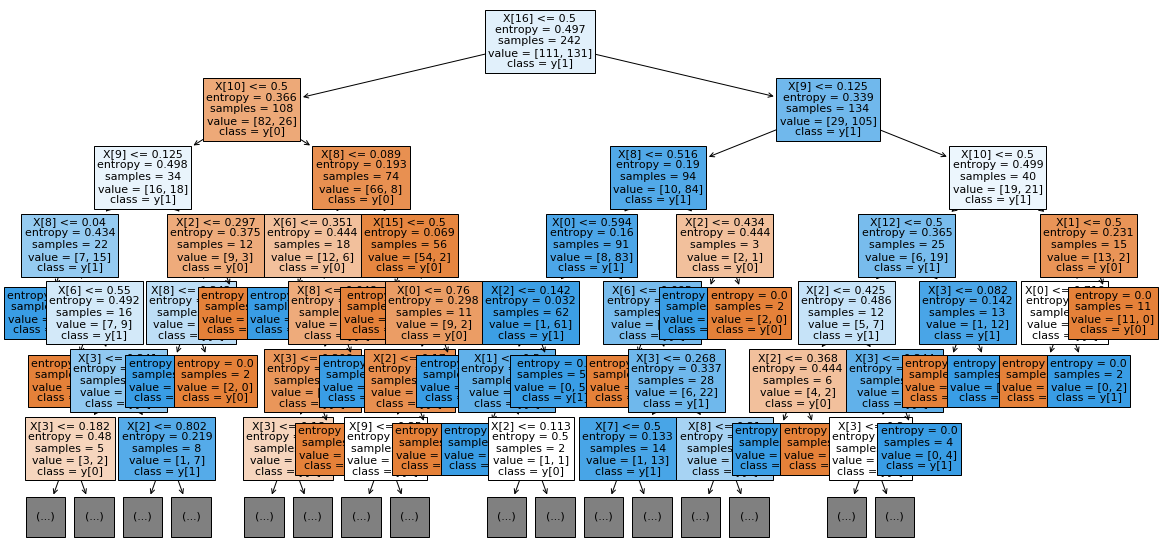

In [7]:
from sklearn import tree
from matplotlib.pyplot import figure
plt.figure(figsize=(20,10))
tree.plot_tree(dtc.fit(x_train, y_train), max_depth=6,fontsize=11, class_names=True, filled=True);

## Support Vector Machines

In [18]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

svc = SVC(random_state = 1)

svc = Pipeline([
('scaler', StandardScaler()),
('pca', PCA(n_components=4)),
('svm', SVC(random_state = 1))
])

svc.fit(x_train, y_train)
print("Test Accuracy of the SVM model: {:.2f}%".format(svc.score(x_test,y_test)*100))

Test Accuracy of the SVM model: 88.52%


/home/ck/Dokumente/veranstaltungen/2019/informatica/informatica_2019_scikit-learn/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
